In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from numpy import pi

## Fourier transforms and series

For any signal $h(t)$, its Fourier transform can be defined as:

$$H(f)=\int_{-\infty}^{\infty} h(t) \; e^{-i2\pi f t} dt$$

This decomposes the signal into its frequency components. The inverse Fourier transform "reassembles" the function:

$$h(t)=\int_{-\infty}^{\infty} H(f) \; e^{i2\pi f t} df$$

For a signal with period $T$, the transform becomes a series. Replacing the frequencies $f$ with $n/T$:

$$H_n=\int_{-\infty}^\infty h(t)\; e^{-i2\pi nt/T} dt$$
$$h(t)=\frac{1}{T}\sum_{n=-\infty}^{\infty} H_n \; e^{i2\pi nt/T}$$


## Discrete signal sampling and the Nyquist Criterion

A signal is often sampled as a series of discrete points. Consider sampling a signal at $N$ equally spaced points: 
$$t_k=k\Delta,\, k=0,1,...(N-1)$$
with $T=N\Delta$

The sampling rate $f_s$ is $1/\Delta$

To completely recover all Fourier components of a signal, the sampling rate must be high enough to effectively "capture" the highest frequency component. The highest frequency that can be represented is known as the __Nyquist critical frequency__ $f_c$, where there are two samples in each cycle.

$$f_c = \frac{1}{2\Delta}$$

The **Nyquist-Shannon theorem** states that if a signal is band-limited to frequencies below $f_c$, then a signal can be completely determined by its Fourier coefficients.

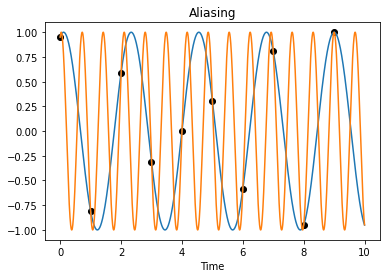

In [4]:
# Sampling
Delta = 1
t_k = np.arange(0, 10, Delta)
f_c = 1/(2*Delta)
f_0 = 0.9*f_c
phi = 0.4*pi
y_k = np.sin(2*pi*f_0*t_k+phi)

# Plotting samples and possible signals
t_space = np.arange(0, 10, 0.001)
y_1 = np.sin(2*pi*f_0*t_space+phi)
y_2 = np.sin(2*pi*(f_0+1/Delta)*t_space+phi)

plt.scatter(t_k,y_k, c="black")
plt.plot(t_space,y_1)
plt.plot(t_space,y_2)

plt.xlabel("Time")
plt.title("Aliasing")

plt.show()


If the signal is not band-limited, then it is not uniquely determined. In the example above, 2 sine waves with frequencies $f_0$ and $f_0+n/\Delta$ both match the samples. This is why most signals are bandpass filtered before sampling.

## The Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT)

For a signal with $N$ samples $h_k$, it can be decomposed into $N$ different frequencies, with the highest one being $f_c$. Switching from $t$ to $t_k$, the DFT can be defined as:

$$H_n=\sum_{k=0}^{N-1}h_k\,e^{-i2\pi (n/N\Delta)(k\Delta)}=\sum_{k=0}^{N-1}h_k\,e^{-i2\pi kn/N}$$

The samples are mapped onto $n$ different frequencies $f_n$, which are:

$$f_n=\frac{n}{N\Delta}=\frac{2n}{N}f_c$$

The signal is periodic in both time and frequency domains, with $h_{k+N}=h_k$ and $H_{k+N}=H_k$

The inverse DFT would give $h_k$ as:

$$h_k=\frac{1}{N}\sum_{n=0}^{N-1}H_n\,e^{i2\pi kn/N}$$

As $f_c$ is the highest frequency that can be represented, all frequencies with $(N/2)+1 < n < N$ can be thought of as negative frequencies, as they are equivalent to $f_n-2f_c=n/(N\Delta)-1/\Delta$

The Fast Fourier Transform (FFT) is an algorithm that computes the DFT much faster. The DFT is an $\mathcal{O}(N^2)$ process (multiplying an $N\times N$ matrix by a column vector of dimension $N$), but the FFT is $\mathcal{O}(N\log_2N)$.

It accomplishes this by splitting the DFT into odd and even terms, and works fastest when $N$ is a power of 2.

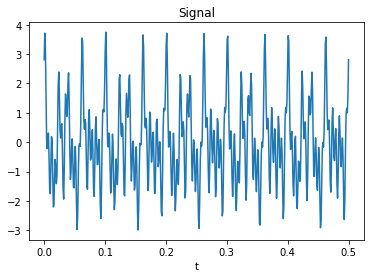

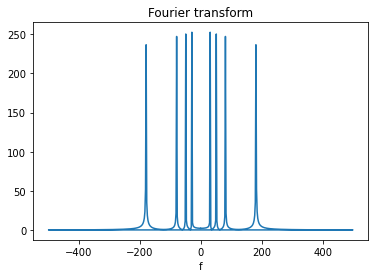

In [5]:
# Sampling
N = 500
dt = 1/1000

# Generating the signal
x = np.linspace(0, N*dt, N)
f1 = 50
f2 = 80
y = np.sin(2*pi*f1*x+0.3*pi)+np.cos(2*pi*f2*x)+np.sin(2*pi*(2*f1+f2)*x)+np.cos(2*pi*(f1-f2)*x)

# The Fast Fourier Transform
yf = fft(y)
xf = fftfreq(N, dt)

# Plotting the signal and the DFT
plt.plot(x,y)
plt.title("Signal")
plt.xlabel("t")
plt.show()

plt.plot(xf,abs(yf))
plt.title("Fourier transform")
plt.xlabel("f")
plt.show()